In [101]:
import SimpleITK as sitk
import os

In [102]:
for root, dirs, files in os.walk("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/training"):
    
    print("Current directory:", root)
    print("Subdirectories:", dirs)
    print("Files:", files)
    print("----------------------------")
    if "4d" in os.path.basename(root):
        pass
        # print("Current directory:", root)

Current directory: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/training
Subdirectories: ['patient015', 'patient012', 'patient024', 'patient023', 'patient048', 'patient083', 'patient077', 'patient070', 'patient084', 'patient079', 'patient046', 'patient041', 'patient022', 'patient025', 'patient013', 'patient014', 'patient040', 'patient078', 'patient047', 'patient085', 'patient071', 'patient049', 'patient076', 'patient082', 'patient054', 'patient053', 'patient098', 'patient091', 'patient065', 'patient062', 'patient096', 'patient009', 'patient036', 'patient031', 'patient038', 'patient007', 'patient097', 'patient063', 'patient064', 'patient090', 'patient052', 'patient099', 'patient055', 'patient001', 'patient039', 'patient006', 'patient030', 'patient008', 'patient037', 'patient073', 'patient087', 'patient080', 'patient074', 'patient089', 'patient042', 'patient045', 'patient011', 'patient016', 'patient029', 'patient020', 'patient027', 'patient018', 'patient044', 'pati

In [103]:
for file_name in os.listdir("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/testing"):
    file_path = os.path.join("Data/ACDC/database/testing", file_name)
    print(file_path)

Data/ACDC/database/testing/patient104
Data/ACDC/database/testing/patient103
Data/ACDC/database/testing/patient135
Data/ACDC/database/testing/.DS_Store
Data/ACDC/database/testing/patient132
Data/ACDC/database/testing/patient150
Data/ACDC/database/testing/patient133
Data/ACDC/database/testing/patient134
Data/ACDC/database/testing/patient102
Data/ACDC/database/testing/patient105
Data/ACDC/database/testing/patient145
Data/ACDC/database/testing/patient142
Data/ACDC/database/testing/patient118
Data/ACDC/database/testing/patient127
Data/ACDC/database/testing/patient120
Data/ACDC/database/testing/patient129
Data/ACDC/database/testing/patient116
Data/ACDC/database/testing/patient111
Data/ACDC/database/testing/patient143
Data/ACDC/database/testing/patient144
Data/ACDC/database/testing/patient110
Data/ACDC/database/testing/patient128
Data/ACDC/database/testing/patient117
Data/ACDC/database/testing/patient121
Data/ACDC/database/testing/patient119
Data/ACDC/database/testing/patient126
Data/ACDC/dat

In [104]:
import os
import shutil
import SimpleITK as sitk
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom

def clone_directory_structure(src, dst):
    """
    Clone the directory structure from src to dst.
    """
    for root, dirs, files in os.walk(src):
        # Create the corresponding directory in the destination
        dst_dir = root.replace(src, dst, 1)  # Replace src with dst in the path
        os.makedirs(dst_dir, exist_ok=True)  # Create the directory if it doesn't exist

def process_single_slice_dicom(dicom_file, target_resolution, output_dir):
    """
    Load and standardize the resolution of a single-slice DICOM file.
    """
    try:
        # Read the DICOM file
        nifti_img = nib.load(dicom_file)
        data = nifti_img.get_fdata()
        affine = nifti_img.affine
        
        # Get the current resolution
        current_res = np.abs(affine.diagonal()[:data.ndim])  # Use the appropriate dimensions
        print("Current resolution:", current_res)
        
        # Standardize the resolution
        target_res = np.array(target_resolution[:data.ndim])  # Adjust target resolution based on dimensions
        zoom_factors = current_res / target_res  # Calculate zoom factors
        
        # Resample the data
        resampled_data = zoom(data, zoom_factors, order=1)

        # Adjust the affine matrix based on zoom factors
        new_affine = np.copy(affine)
        new_affine[:data.ndim, :data.ndim] *= np.diag(zoom_factors)  # Adjust the affine for appropriate dimensions

        # Create a new NIfTI image
        resampled_nifti = nib.Nifti1Image(resampled_data, new_affine)
        
        # Save the standardized image as a .nii file in the output directory
        output_file = os.path.join(output_dir, os.path.basename(dicom_file))
        nib.save(resampled_nifti, output_file)
        new_size = resampled_nifti.shape
        new_spacing = np.abs(np.diag(resampled_nifti.affine)[:data.ndim])
        print(f"New size: {new_size}")
        print(f"New spacing: {new_spacing}")
        print(f"Processed and saved: {output_file}")
    except Exception as e:
        print(f"Failed to process {dicom_file}: {str(e)}")


def loop_and_standardize(dataset_path, target_resolution, output_path, search_term="4d"):
    """
    Loop over the dataset, clone the folder structure, and standardize the resolution of single-slice data.
    """
    # Clone the directory structure
    clone_directory_structure(dataset_path, output_path)

    for root, dirs, files in os.walk(dataset_path):
        # Ignore directories with '4d' in their name
        if search_term not in os.path.basename(root):
            for file in files:
                if file.endswith(".nii"):  # Assuming DICOM files are used
                    dicom_file_path = os.path.join(root, file)
                    print(f"Processing: {dicom_file_path}")
                    
                    # Process and save in the corresponding output directory
                    output_dir = root.replace(dataset_path, output_path, 1)
                    process_single_slice_dicom(dicom_file_path, target_resolution, output_dir)

# Example usage:
dataset_path = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/training"  # Original dataset path
output_path = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_standardized"  # New path for standardized data
target_resolution = (1.5, 1.5, 1.0)  # Example target resolution (x, y, z spacing)

loop_and_standardize(dataset_path, target_resolution, output_path)


Processing: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/training/patient015/patient015_frame10_gt.nii/DCM27_V3_9.nii
Current resolution: [1. 1. 1.]
New size: (171, 144, 9)
New spacing: [0.66666667 0.66666667 1.        ]
Processed and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_standardized/patient015/patient015_frame10_gt.nii/DCM27_V3_9.nii
Processing: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/training/patient015/patient015_frame01.nii/0.nii
Current resolution: [1. 1. 1.]
New size: (171, 144, 9)
New spacing: [0.66666667 0.66666667 1.        ]
Processed and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_standardized/patient015/patient015_frame01.nii/0.nii
Processing: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/training/patient015/patient015_frame10.nii/9.nii
Current resolution: [1. 1. 1.]
New size: (171, 144, 9)
New spacing: [0.66666667 0.66666

In [105]:
# process_single_slice_dicom("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/training/patient001/patient001_frame01.nii/CMD03Gate1.nii", target_resolution, "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_standardized/patient111")

In [106]:
import os
import SimpleITK as sitk

def check_unified_resolution(output_path):
    """
    Check if all images in the output directory have unified resolution.
    """
    resolutions = set()  # To store unique resolutions

    for root, dirs, files in os.walk(output_path):
    
        for file in files:
            # print(file)
            if file.endswith(".nii"):  # Check for NIfTI files
                nifti_file_path = os.path.join(root, file)
                try:
                    image = sitk.ReadImage(nifti_file_path)
                    spacing = image.GetSpacing()  # Get the spacing (resolution)
                    resolutions.add(spacing)  # Add to the set of unique resolutions

                except Exception as e:
                    print(f"Failed to read {nifti_file_path}: {str(e)}")

    # Check the number of unique resolutions
    if len(resolutions) == 1:
        print("All images have a unified resolution.")
    else:
        print("There are multiple resolutions in the dataset:")
        for res in resolutions:
            print(res)

# Example usage:
output_path = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_standardized"  # Path where standardized images are saved
check_unified_resolution(output_path)


All images have a unified resolution.


In [107]:
def convert_to_numpy_and_save(input_dir, output_dir, naming_convention="DatasetID_patientID_seriesType"):
    """
    Loop over the standardized dataset, convert images to NumPy arrays, and save them with the specified naming convention.
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".nii"):  # Process only NIfTI files
                try:
                    # Load the NIfTI image
                    nii_file_path = os.path.join(root, file)
                    image = sitk.ReadImage(nii_file_path)
                    
                    # Convert the image to a NumPy array
                    image_array = sitk.GetArrayFromImage(image)

                    # Extract patientID and seriesType from the file name and directory structure
                    # Assuming the directory structure is something like 'input_dir/patientXYZ/.../file_frameXX.nii'
                    patient_id = os.path.basename(os.path.dirname(root))  # Get parent directory (patientID)
                    series_type = os.path.basename(root).split('_')  # Assuming 'file_frameXX.nii'
                    if series_type.__len__() == 3:
                        series_t = series_type[1] + '_' + series_type[2].replace('.nii', '')

                    else:
                        series_t = series_type[1].replace('.nii', '')

                    # Create the output file name based on the naming convention
                    output_file_name = f"{naming_convention.replace('DatasetID', 'ACDC').replace('patientID', patient_id).replace('seriesType', series_t)}.npy"

                    # Create the full output file path
                    output_file_path = os.path.join(output_dir, output_file_name)

                    # Save the NumPy array
                    np.save(output_file_path, image_array)

                    print(f"Converted and saved: {output_file_path}")

                except Exception as e:
                    print(f"Failed to process {file}: {str(e)}")

# Example usage:
input_dir = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_standardized"  # Path to the standardized dataset
output_dir = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy"  # Path where you want to save the NumPy arrays

convert_to_numpy_and_save(input_dir, output_dir)

Converted and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/ACDC_patient015_frame10_gt.npy
Converted and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/ACDC_patient015_frame01.npy
Converted and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/ACDC_patient015_frame10.npy
Converted and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/ACDC_patient015_frame01_gt.npy
Converted and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/ACDC_patient012_frame13.npy
Converted and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/ACDC_patient012_frame01.npy
Converted and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/ACDC_patient012_frame01_gt.npy
Converted and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database

In [108]:
folder_path = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy"
file_names = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

# Load the arrays and find the minimum shape
shapes = []
arrays = []

for file_name in file_names:
    array = np.load(os.path.join(folder_path, file_name))
    arrays.append(array)
    shapes.append(array.shape)

# Find the minimum shape
min_shape = np.min(shapes, axis=0)
print(f"Minimum shape found: {min_shape}")

Minimum shape found: [  6 103 103]


In [109]:
# Downsample the arrays to the minimum shape
for file_name in file_names:
    array = np.load(os.path.join(folder_path, file_name))
    zoom_factors = np.array(min_shape) / np.array(array.shape)
    downsampled_array = zoom(array, zoom_factors, order=1)
    np.save(os.path.join(folder_path, file_name), downsampled_array)

In [110]:
# Path to the folder containing your NumPy arrays
np_folder_path = '/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy'

# Initialize a variable to hold the target shape
target_shape = None


# Loop through all files in the folder
for np_file in os.listdir(np_folder_path):
    if np_file.endswith('.npy'):  # Only process NumPy files
        np_file_path = os.path.join(np_folder_path, np_file)
        
        # Load the NumPy array
        array_data = np.load(np_file_path)
        
        # Get the shape of the current array
        current_shape = array_data.shape
        

        if target_shape is None:
            # Set the target shape as the shape of the first array
            target_shape = current_shape
            print(f"Target shape is set to: {target_shape}")
        elif current_shape != target_shape:
            pass
            # If the shape doesn't match the target, print a warning
            print(f"File {np_file} does not match the target shape. Found shape: {current_shape}")
        else:
            pass
            # If the shape matches, print a confirmation
            print(f"File {np_file} matches the target shape: {current_shape}")
   


Target shape is set to: (6, 103, 103)
File ACDC_patient020_frame11_gt.npy matches the target shape: (6, 103, 103)
File ACDC_patient035_frame11_gt.npy matches the target shape: (6, 103, 103)
File ACDC_patient074_frame12.npy matches the target shape: (6, 103, 103)
File ACDC_patient061_frame10.npy matches the target shape: (6, 103, 103)
File ACDC_patient024_frame09.npy matches the target shape: (6, 103, 103)
File ACDC_patient074_frame12_gt.npy matches the target shape: (6, 103, 103)
File ACDC_patient044_frame11_gt.npy matches the target shape: (6, 103, 103)
File ACDC_patient051_frame11_gt.npy matches the target shape: (6, 103, 103)
File ACDC_patient064_frame01.npy matches the target shape: (6, 103, 103)
File ACDC_patient048_frame08.npy matches the target shape: (6, 103, 103)
File ACDC_patient029_frame01_gt.npy matches the target shape: (6, 103, 103)
File ACDC_patient024_frame09_gt.npy matches the target shape: (6, 103, 103)
File ACDC_patient014_frame01.npy matches the target shape: (6, 10

(6, 103, 103)
Loaded a 3D image with shape: (6, 103, 103)


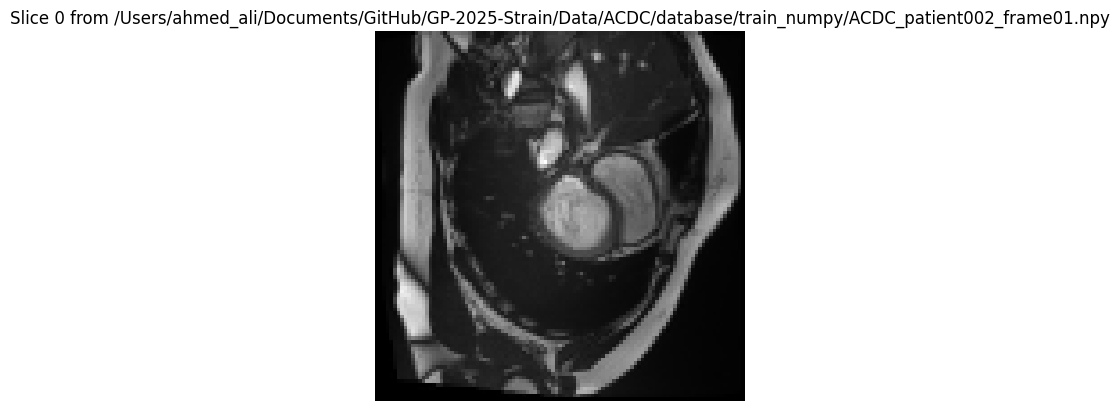

In [111]:
import matplotlib.pyplot as plt

def plot_npy_file(npy_file_path, slice_index=0):
    """
    Load a .npy file and plot a specific slice of the 3D image (if applicable).
    
    Args:
        npy_file_path (str): Path to the .npy file.
        slice_index (int): Index of the slice to plot (for 3D images).
    """
    # Load the .npy file
    image_array = np.load(npy_file_path)
    print(image_array.shape)
    # Check if it's 3D or 2D
    if image_array.ndim == 3:
        print(f"Loaded a 3D image with shape: {image_array.shape}")
        # Plot the selected slice
        plt.imshow(image_array[slice_index, :, :], cmap='gray')
        plt.title(f"Slice {slice_index} from {npy_file_path}")
    elif image_array.ndim == 2:
        print(f"Loaded a 2D image with shape: {image_array.shape}")
        # Plot the 2D image
        plt.imshow(image_array, cmap='gray')
        plt.title(f"2D Image from {npy_file_path}")

    #reverse the plot
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.axis('off')
    plt.show()

# Example usage:
npy_file_path = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/ACDC_patient002_frame01.npy"
plot_npy_file(npy_file_path, slice_index=0)  # Display the





In [112]:
#z score normalization
def z_score_normalization(image_array):
    """
    Perform Z-score normalization on the input image array.
    
    Args:
        image_array (np.ndarray): Input image array.
    
    Returns:
        np.ndarray: Z-score normalized image array.
    """
    mean = np.mean(image_array)
    std = np.std(image_array)
    z_score_normalized = (image_array - mean) / std
    return z_score_normalized

for np_file in os.listdir(np_folder_path):
    if np_file.endswith('.npy'):  # Only process NumPy files
        np_file_path = os.path.join(np_folder_path, np_file)
        
        # Load the NumPy array
        array_data = np.load(np_file_path)
        
        # Perform Z-score normalization
        z_score_normalized = z_score_normalization(array_data)
        
        # Save the normalized array
        output_file_path = os.path.join(np_folder_path, f"z_score_normalized_{np_file}")
        np.save(output_file_path, z_score_normalized)
        
        print(f"Z-score normalized and saved: {output_file_path}")

Z-score normalized and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/z_score_normalized_ACDC_patient065_frame14_gt.npy
Z-score normalized and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/z_score_normalized_ACDC_patient020_frame11_gt.npy
Z-score normalized and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/z_score_normalized_ACDC_patient035_frame11_gt.npy
Z-score normalized and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/z_score_normalized_ACDC_patient074_frame12.npy
Z-score normalized and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/z_score_normalized_ACDC_patient061_frame10.npy
Z-score normalized and saved: /Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/ACDC/database/train_numpy/z_score_normalized_ACDC_patient024_frame09.npy
Z-score normalized and saved: /Users/ahmed_ali/Do